In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
all_BE = {}
for file in os.listdir('./outputs/BF_xerr/'):
    be = []
    with open('./outputs/BF_xerr/'+file, 'rb') as f:
        data = np.loadtxt(f, delimiter=',')
        # be = np.exp(data[:,0] - data[:,0][0])
        be = data[:,0] - data[:,0][0]
        # print(be)
    f.close()
    all_BE[file.replace('_results.txt', '')] = be
    # with open('./outputs/BE/'+file, 'wb') as f:
    #     np.savetxt(f, be, delimiter=',')
        
    f.close()

In [3]:
all_BE_df = pd.DataFrame(all_BE).T

In [4]:
all_BE_df

,0,1,2
GRB081221,0.0,-1.771487,-0.468297
GRB120119A,0.0,-0.700071,-0.022159
GRB210204A,0.0,-0.970365,-0.880134
GRB200613A,0.0,-1.346769,-0.462269
GRB171010A,0.0,-0.586773,-0.074965
GRB130925A,0.0,-0.531013,-0.207708
GRB180720B,0.0,-1.268029,-0.604864
GRB131231A,0.0,-1.976943,-2.221573
GRB131108A,0.0,-1.857830,-0.650848
GRB150514A,0.0,-1.692558,-0.773805


In [5]:
all_BE_df.sort_index(inplace=True, ascending=False)

In [6]:
all_BE_df

,0,1,2
GRB210619B,0.0,-8.113687,-9.262768
GRB210610B,0.0,-0.753805,-1.030008
GRB210204A,0.0,-0.970365,-0.880134
GRB201216C,0.0,-1.585909,-0.596552
GRB200829A,0.0,-1.929792,18.441521
GRB200613A,0.0,-1.346769,-0.462269
GRB190114C,0.0,-1.870675,-0.665979
GRB180720B,0.0,-1.268029,-0.604864
GRB180703A,0.0,-1.940965,-0.849975
GRB171010A,0.0,-0.586773,-0.074965


In [7]:
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0).T

In [8]:
grbparam.sort_index(inplace=True, ascending=False)

In [9]:
grbparam

GRB,E0,Emax,redshift
GRB210619B,10.0,11000.0,1.9370
GRB210610B,30.0,380.0,1.1300
GRB210204A,10.0,400.0,0.8760
GRB201216C,15.0,700.0,1.1000
GRB200829A,25.0,3500.0,1.2500
GRB200613A,30.0,300.0,1.2200
GRB190114C,10.0,5000.0,0.4250
GRB180720B,25.0,17000.0,0.6540
GRB180703A,20.0,400.0,0.6678
GRB171010A,10.0,620.0,0.3285


In [10]:
new_df = pd.concat([grbparam, all_BE_df], axis=1)

In [11]:
new_df.drop(['Emax'], axis=1, inplace=True)

In [12]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-8.113687,-9.262768
GRB210610B,30.0,1.1300,0.0,-0.753805,-1.030008
GRB210204A,10.0,0.8760,0.0,-0.970365,-0.880134
GRB201216C,15.0,1.1000,0.0,-1.585909,-0.596552
GRB200829A,25.0,1.2500,0.0,-1.929792,18.441521
GRB200613A,30.0,1.2200,0.0,-1.346769,-0.462269
GRB190114C,10.0,0.4250,0.0,-1.870675,-0.665979
GRB180720B,25.0,0.6540,0.0,-1.268029,-0.604864
GRB180703A,20.0,0.6678,0.0,-1.940965,-0.849975
GRB171010A,10.0,0.3285,0.0,-0.586773,-0.074965


In [13]:
new_df.sort_index(inplace=True, ascending=False)

In [14]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-8.113687,-9.262768
GRB210610B,30.0,1.1300,0.0,-0.753805,-1.030008
GRB210204A,10.0,0.8760,0.0,-0.970365,-0.880134
GRB201216C,15.0,1.1000,0.0,-1.585909,-0.596552
GRB200829A,25.0,1.2500,0.0,-1.929792,18.441521
GRB200613A,30.0,1.2200,0.0,-1.346769,-0.462269
GRB190114C,10.0,0.4250,0.0,-1.870675,-0.665979
GRB180720B,25.0,0.6540,0.0,-1.268029,-0.604864
GRB180703A,20.0,0.6678,0.0,-1.940965,-0.849975
GRB171010A,10.0,0.3285,0.0,-0.586773,-0.074965


In [15]:
data = []
for i in os.listdir('./outputs/GOF_xerr/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('_GOF.txt'):
        data.append([i.replace('_GOF.txt', ''), *np.loadtxt('./outputs/GOF_xerr/' + i)])
df2 = pd.DataFrame(data, columns=['GRB', 'Null', 'Linear', 'Quadratic'])
df2.index = df2['GRB']
df2.drop('GRB', axis=1, inplace=True)
df2.sort_index(inplace=True, ascending=False)

In [16]:
final = pd.concat([new_df, df2], axis=1)

In [17]:
final

,E0,redshift,0,1,2,Null,Linear,Quadratic
GRB210619B,10.0,1.9370,0.0,-8.113687,-9.262768,4.179377,4.597010,4.974694
GRB210610B,30.0,1.1300,0.0,-0.753805,-1.030008,1.030807,0.901892,1.001589
GRB210204A,10.0,0.8760,0.0,-0.970365,-0.880134,8.553132,8.885568,8.958907
GRB201216C,15.0,1.1000,0.0,-1.585909,-0.596552,1.129838,1.427892,1.100851
GRB200829A,25.0,1.2500,0.0,-1.929792,18.441521,8.785259,9.232302,6.269615
GRB200613A,30.0,1.2200,0.0,-1.346769,-0.462269,0.796134,0.734019,0.701078
GRB190114C,10.0,0.4250,0.0,-1.870675,-0.665979,5.204461,5.934907,5.715064
GRB180720B,25.0,0.6540,0.0,-1.268029,-0.604864,1.150093,1.472184,1.482493
GRB180703A,20.0,0.6678,0.0,-1.940965,-0.849975,10.405923,11.112220,10.930601
GRB171010A,10.0,0.3285,0.0,-0.586773,-0.074965,0.838633,0.696644,0.663979


In [18]:
final = final[['E0', 'redshift', 0, 'Null', 1, 'Linear', 2, 'Quadratic']]

In [19]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,4.179377,-8.113687,4.597010,-9.262768,4.974694
GRB210610B,30.0,1.1300,0.0,1.030807,-0.753805,0.901892,-1.030008,1.001589
GRB210204A,10.0,0.8760,0.0,8.553132,-0.970365,8.885568,-0.880134,8.958907
GRB201216C,15.0,1.1000,0.0,1.129838,-1.585909,1.427892,-0.596552,1.100851
GRB200829A,25.0,1.2500,0.0,8.785259,-1.929792,9.232302,18.441521,6.269615
GRB200613A,30.0,1.2200,0.0,0.796134,-1.346769,0.734019,-0.462269,0.701078
GRB190114C,10.0,0.4250,0.0,5.204461,-1.870675,5.934907,-0.665979,5.715064
GRB180720B,25.0,0.6540,0.0,1.150093,-1.268029,1.472184,-0.604864,1.482493
GRB180703A,20.0,0.6678,0.0,10.405923,-1.940965,11.112220,-0.849975,10.930601
GRB171010A,10.0,0.3285,0.0,0.838633,-0.586773,0.696644,-0.074965,0.663979


In [20]:
final['Null'] = final['Null'].round(1)
final['Linear'] = final['Linear'].round(1)
final['Quadratic'] = final['Quadratic'].round(1)
final[1] = final[1].round(1)
final[2] = final[2].round(1)

In [21]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,4.2,-8.1,4.6,-9.3,5.0
GRB210610B,30.0,1.1300,0.0,1.0,-0.8,0.9,-1.0,1.0
GRB210204A,10.0,0.8760,0.0,8.6,-1.0,8.9,-0.9,9.0
GRB201216C,15.0,1.1000,0.0,1.1,-1.6,1.4,-0.6,1.1
GRB200829A,25.0,1.2500,0.0,8.8,-1.9,9.2,18.4,6.3
GRB200613A,30.0,1.2200,0.0,0.8,-1.3,0.7,-0.5,0.7
GRB190114C,10.0,0.4250,0.0,5.2,-1.9,5.9,-0.7,5.7
GRB180720B,25.0,0.6540,0.0,1.2,-1.3,1.5,-0.6,1.5
GRB180703A,20.0,0.6678,0.0,10.4,-1.9,11.1,-0.8,10.9
GRB171010A,10.0,0.3285,0.0,0.8,-0.6,0.7,-0.1,0.7


In [22]:
final.to_latex("./outputs/table_xerr.tex", float_format="%.2f")#, columns=['GRB', 'E0 (keV)', 'Redshift', 'Null $\ln(BF)$', 'Null_$\chi^2_{\\nu}$', 'Null + Lin LIV $\ln(BF)$', 'Null+ Lin LIV\_$\chi^2_{\\nu}$', 'Null +Quad LIV $\ln(BF)$', 'Null+Quad LIV\_$\chi^2_{\\nu}$'])

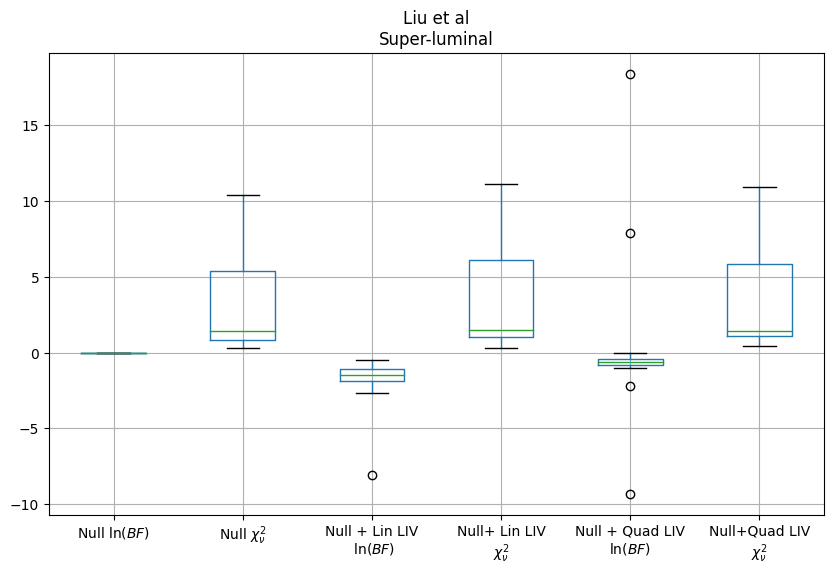

In [23]:
plt.figure(figsize=(10, 6))
temp= final.drop(['E0', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Liu et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()